In [1]:
from source.report.report_utils import preprocess_results
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data and hyperparameters
episodes, config = preprocess_results('classicalCartPole-v1')

In [2]:
episodes.head(50)

,trial_id,run_id,episode,training_score,evaluation_score,epsilon,training_actions,training_steps,training_steps_cumsum,evaluation_actions,evaluation_observations,evaluation_predictions,environment,layers,learning_rate,neurons,number_of_weights
0,2023-04-03_12-26-44_thread_0_trial_0,run_0,0,21,91.0,0.97,"[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, ...",22,22,"[[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,...","[[array([ 0.04766998, -0.01198043, 0.04232462...","[[array([0.5880403 , 0.59943855], dtype=float3...",CartPole-v1,4,0.01,16,1104
1,2023-04-03_12-26-44_thread_0_trial_0,run_0,1,19,8.0,0.90,"[1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...",20,42,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[array([ 0.04766998, -0.01198043, 0.04232462...","[[array([15.448143, 10.9603 ], dtype=float32)...",CartPole-v1,4,0.01,16,1104
2,2023-04-03_12-26-44_thread_0_trial_0,run_0,2,17,8.0,0.83,"[0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...",18,60,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[array([ 0.04766998, -0.01198043, 0.04232462...","[[array([54.480583, 49.37958 ], dtype=float32)...",CartPole-v1,4,0.01,16,1104
3,2023-04-03_12-26-44_thread_0_trial_0,run_0,3,12,10.0,0.79,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",13,73,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, ...","[[array([ 0.04766998, -0.01198043, 0.04232462...","[[array([53.787453, 62.22421 ], dtype=float32)...",CartPole-v1,4,0.01,16,1104
4,2023-04-03_12-26-44_thread_0_trial_0,run_0,4,38,10.0,0.68,"[0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, ...",39,112,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, ...","[[array([ 0.04766998, -0.01198043, 0.04232462...","[[array([31.831839, 33.082207], dtype=float32)...",CartPole-v1,4,0.01,16,1104
5,2023-04-03_12-26-44_thread_0_trial_0,run_0,5,32,10.0,0.59,"[0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, ...",33,145,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, ...","[[array([ 0.04766998, -0.01198043, 0.04232462...","[[array([32.752914, 33.118603], dtype=float32)...",CartPole-v1,4,0.01,16,1104
6,2023-04-03_12-26-44_thread_0_trial_0,run_0,6,12,10.0,0.56,"[1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]",13,158,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, ...","[[array([ 0.04766998, -0.01198043, 0.04232462...","[[array([30.757881, 31.23971 ], dtype=float32)...",CartPole-v1,4,0.01,16,1104
7,2023-04-03_12-26-44_thread_0_trial_0,run_0,7,13,10.0,0.53,"[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0]",14,172,"[[0, 0, 0, 0, 1, 0, 1, 0, 1, 0], [0, 0, 0, 0, ...","[[array([ 0.04766998, -0.01198043, 0.04232462...","[[array([29.698488, 29.311811], dtype=float32)...",CartPole-v1,4,0.01,16,1104
8,2023-04-03_12-26-44_thread_0_trial_0,run_0,8,34,8.0,0.46,"[1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, ...",35,207,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[array([ 0.04766998, -0.01198043, 0.04232462...","[[array([36.992725, 33.06617 ], dtype=float32)...",CartPole-v1,4,0.01,16,1104
9,2023-04-03_12-26-44_thread_0_trial_0,run_0,9,18,10.0,0.43,"[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",19,226,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, ...","[[array([ 0.04766998, -0.01198043, 0.04232462...","[[array([46.664196, 47.44013 ], dtype=float32)...",CartPole-v1,4,0.01,16,1104


In [3]:
# select best score per run
episodes_grouped = episodes.groupby(['trial_id', 'run_id']).agg(
    {'evaluation_score': 'max'}).reset_index()

# find best trial based on average evaluation score
episodes_grouped = episodes_grouped.groupby(['trial_id']).agg(
    {'evaluation_score': 'mean'}).reset_index()

In [4]:
# get the trial id of the best trial
best_trial_id = \
episodes_grouped[episodes_grouped['evaluation_score'] == episodes_grouped['evaluation_score'].max()]['trial_id'].values[
    0]
best_trial = episodes[episodes['trial_id'] == best_trial_id]

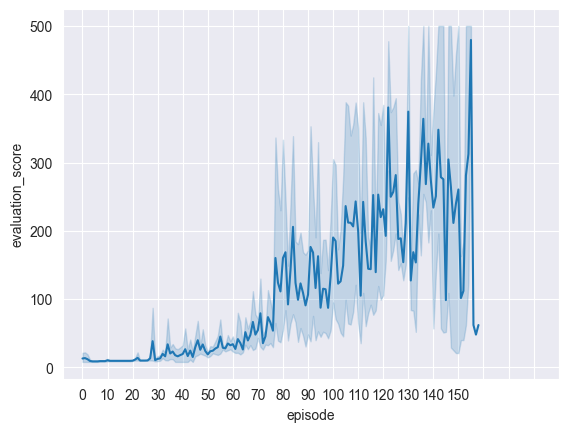

In [5]:
# plot the trial with the best average evaluation score
sns.lineplot(x='episode', y='evaluation_score', data=best_trial)
plt.xticks(range(0, 200, 10))
plt.show()
